In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

%matplotlib inline


In [13]:
events = pd.read_csv('events.csv',encoding = "ISO-8859-1")

In [12]:
users = pd.read_csv('users.csv',encoding = "ISO-8859-1")

In [11]:
user_friend = pd.read_csv('user_friends.csv',encoding = "ISO-8859-1")

In [10]:
event_attendees = pd.read_csv('event_attendees.csv',encoding = "ISO-8859-1")

In [2]:
test = pd.read_csv('test.csv',encoding = "ISO-8859-1")

In [3]:
train = pd.read_csv('train.csv',encoding = "ISO-8859-1")

In [14]:
lats = events['lat'][:]
lons = events['lng'][:]


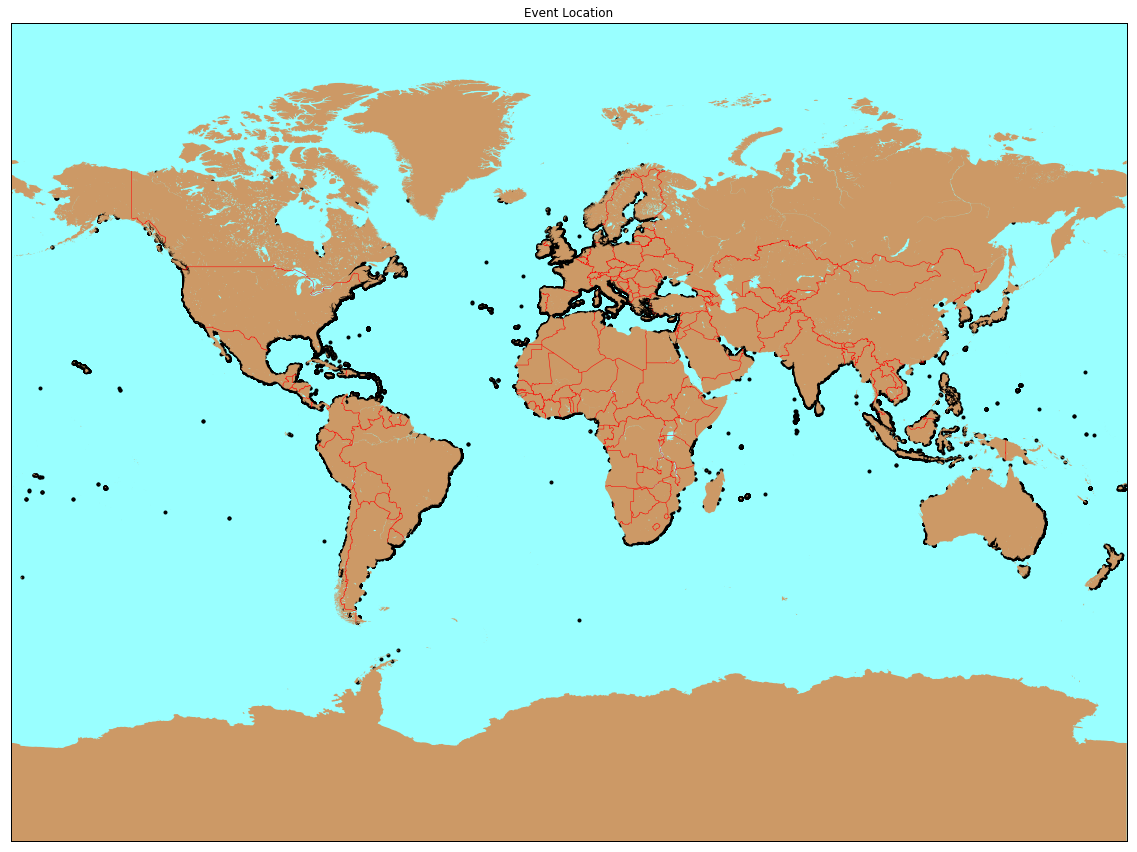

In [15]:

plt.figure(figsize=(20,16))
#print(lats[:10])
#m = Basemap(projection='hammer',lon_0=180)
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='h')
x, y = m(lons.tolist(),lats.tolist())
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,9,marker='o',color='k')
m.drawcountries(linewidth=0.5, linestyle='solid', color='red', antialiased=1, ax=None, zorder=None)
plt.title('Event Location',fontsize=12)
plt.show()

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Beverly Hills  California")
#print(location.address)
user_x=location.latitude
user_y = location.longitude
print((location.latitude, location.longitude))


In [ ]:
#for s in users['location'][:13]:
 #   print(geolocator.geocode(str(s)))
users['latitude'] = [geolocator.geocode(str(s)).latitude if geolocator.geocode(str(s)) is not None else 0.0 for s in users['location']]
users['longitude'] = [geolocator.geocode(str(s)).longitude if geolocator.geocode(str(s)) is not None else 0.0 for s in users['location']]


In [ ]:
plt.figure(figsize=(15,15))
u = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='h')
u.drawmapboundary(fill_color='#99ffff')
u.fillcontinents(color='#cc9966',lake_color='#99ffff')
u.scatter(user_x, user_y,9,marker='*',color='green')
u.drawcountries(linewidth=0.5, linestyle='solid', color='red', antialiased=1, ax=None, zorder=None)
plt.title('User Location',fontsize=12)
plt.show()

In [48]:
print(user_friend['friends'][:1].tolist())
x=1346449342
str(x) in (user_friend['friends'][:1]).tolist()[0]

[['1346449342', '3873244116', '4226080662', '1222907620', '547730952', '1052032722', '2138119761', '417295859', '1872292079', '984265443', '2535686531', '3703382700', '3581879482', '2279455658', '340978873', '156124122', '1470725855', '4141612054', '2696659498', '2502277384', '1741997451', '2183113360', '406756357', '2170357047', '1886083250', '3160228214', '818630635', '3835934628', '2768929089', '3931194914', '1947040285', '1045185118', '668855093', '4052231357', '4004275362', '916302159', '2933715602', '451511901', '1680972291', '3560965883', '423777307', '3237973301', '2775846453', '4043712397', '1977793568', '3431762169', '3702388052', '1358167059', '3301066462', '2628956343', '751704777', '1567468616', '594439071', '731585215', '726548973', '1942477584', '2304161560', '4166000031', '397569368', '1738017389', '2236096129', '3457116476', '3581503440', '3234855418', '3172388605', '2774881603', '3451459435', '3473342714', '3181741470', '2192109958', '2193621845', '3327970867', '22497

True

In [ ]:
train['isfriend'] = pd.Series(np.random.randn(len(train['event'])), index=train.index)
i=0
for user,event in zip(train['user'],train['event']):
    createdby = events[events['event_id'] ==event]
    #print(createdby)
    if (str(createdby['user_id']) in (user_friend[user_friend['user']==user]['friends']).tolist()[0]):
        train['isfriend'][i] = 1
    else:
        train['isfriend'][i] = 0
    i=i+1
    

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
from sklearn import linear_model

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(train.ix[:,[0,1,2,6,7,8,9]], train['interested'].reshape(-1,1))
print('Columns: \n', train.columns)
# The coefficients
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
test['interested'] = reg.predict(test.ix[:,0:3])
print(test['interested'].max(),test['interested'].min())
j=0;
for i in test['interested']:
    if i>0.23:
        test['interested'][j]=1
    else:
        test['interested'][j]=0
    j=j+1


C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Columns: 
 Index(['user', 'event', 'invited', 'timestamp', 'interested',
       'not_interested'],
      dtype='object')
Coefficients: 
 [[ -8.75769458e-13  -9.47836566e-12  -7.94554891e-02]]
Intercept: 
 [ 0.29311704]
0.292950801042

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 0.17033316345
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    0.0
Name: interested, dtype: float64


In [ ]:
from sklearn.svm import SVC
clf = SVC(C=10, kernel='linear')               # penalty parameter, set by data analyst
             # type of svm kernel
print ("abc")
clf.fit(train.ix[:,0:3], train.ix[:,4]) 
print("def")
test['interested'] = clf.predict(test.ix[:,0:3])

print(test['interested'][:50])

In [ ]:
from sklearn import tree

model1 = tree.DecisionTreeClassifier()
model1 = model1.fit(train.ix[:,0:3], train.ix[:,4]) 
predict = model1.predict(test.ix[:,0:3])
print (predict[:25])